In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot


In [2]:
data = pd.read_csv('train.csv')
test =pd.read_csv('test.csv')

In [3]:
data.head() # 28*28 images 784 pixels in input , rows = features , coloumn = batch size


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array (data)  #  converting pd frame into array
test =np.array(test)
m,n = data.shape  # m = batch size, n= feature map
np.random.shuffle(data)

In [5]:
train_data = data[0:int(0.8*m),:]
val_data = data[int(0.8*m):m, :]

X_train = train_data[:,1:].T #transpose for n,m shape

X_train = X_train/255.0 # normalizing data 
Y_train = train_data[:,0] # extracting label of the data 

X_val = val_data[:, 1:].T
X_val = X_val/255.0
Y_val = val_data[:,0]

In [6]:

print(Y_train.shape)
print(X_train.shape)

(33600,)
(784, 33600)


In [ ]:
def initialize_parameters(): #XAVIER initialization
    W1 = np.random.randn(10,784) * np.sqrt(2/7840)  #do not include bias as input
    B1 = np.random.randn(10,1) * np.sqrt(2/7840) #NO OF INPUT TO LAYER 1
    W2 = np.random.randn(10,10) *np.sqrt(2/100)
    B2 =np.random.randn(10,1)*np.sqrt(2/100)

    return W1,B1,W2,B2

def Batch_normalization(Y):

    U = np.mean(Y,axis=0)
    V  = np.var(Y,axis=0)
    Y = (Y-U)/np.sqrt(V+.000000003)
    return Y

def relu(X):
    return np.maximum(0,X)

def Soft_max(Z):
    # Z shape: (n_classes, m) -> softmax per sample (columns)
    Z_shift = Z - np.max(Z, axis=0, keepdims=True)
    expZ = np.exp(Z_shift)
    return expZ / np.sum(expZ, axis=0, keepdims=True)


def softmax(Z):
    return np.exp(Z)/np.sum(np.exp(Z),axis =0)




def one_hot_converter(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    return one_hot_Y.T


 
    
def forward_propagation(W1,B1,W2,B2,X_train):

    Z1 = W1.dot(X_train) + B1
    #Z1 = Batch_normalization(Z1)
    A1  = relu(Z1)
    Z2 = W2.dot(A1) + B2
    A2 = softmax(Z2)

    return Z1,A1,Z2,A2

 
def backward_propagation(W1, B1, W2, B2, Z1, A1, Z2, A2, X, Y):
    m = X.shape[1]                            # use local batch size
    one_hot_Y = one_hot_converter(Y)          # shape (n_classes, m)
    dZ2 = A2 - one_hot_Y                      # (n_classes, m)
    dW2 = (1.0 / m) * dZ2.dot(A1.T)
    dB2 = (1.0 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * (Z1 > 0)            # ReLU derivative
    dW1 = (1.0 / m) * dZ1.dot(X.T)
    dB1 = (1.0 / m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, dB1, dW2, dB2


    

def update_parameters(W1,B1,W2,B2,dW1,dB1,dW2,dB2,learning_rate):

    W1 = W1 - learning_rate * dW1
    B1 = B1 -learning_rate *dB1
    W2 = W2 -learning_rate* dW2
    B2 = B2 -learning_rate*dB2

    return W1,B1,W2,B2




def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  return np.sum(predictions == Y) / Y.size



def gradient_descent(X_train,Y_train,alpha,iterations):
    W1,B1,W2,B2 = initialize_parameters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1,B1,W2,B2,X_train)
        dW1,dB1,dW2,dB2 = backward_propagation(W1, B1, W2, B2, Z1, A1, Z2, A2, X_train, Y_train)
        W1,B1,W2,B2 = update_parameters(W1,B1,W2,B2,dW1,dB1,dW2,dB2,alpha)
        if (i%20) == 0:
            print("iteration number",i)
            print("ACCURACY",get_accuracy(get_predictions(A2),Y_train))
            print(W1,B1,W2,B2)
    return W1,B1,W2,B2


In [ ]:
W1,B1,W2,B2 = gradient_descent(X_train, Y_train, 0.1, 1000)


iteration number 0
ACCURACY 0.09764880952380953
iteration number 20
ACCURACY 0.49214285714285716
iteration number 40
ACCURACY 0.6769345238095238
iteration number 60
ACCURACY 0.757172619047619
iteration number 80
ACCURACY 0.7950595238095238
iteration number 100
ACCURACY 0.8201488095238095
iteration number 120
ACCURACY 0.8375595238095238
iteration number 140
ACCURACY 0.8500595238095238
iteration number 160
ACCURACY 0.8599702380952381
iteration number 180
ACCURACY 0.8664285714285714
iteration number 200
ACCURACY 0.8719940476190476
iteration number 220
ACCURACY 0.8763988095238096
iteration number 240
ACCURACY 0.8798809523809524
iteration number 260
ACCURACY 0.8830654761904762
iteration number 280
ACCURACY 0.8850297619047619
iteration number 300
ACCURACY 0.8872321428571428
iteration number 320
ACCURACY 0.8890476190476191
iteration number 340
ACCURACY 0.89125
iteration number 360
ACCURACY 0.8929464285714286
iteration number 380
ACCURACY 0.8942261904761905
iteration number 400
ACCURACY 0.8955

predicted_label [3]
actual_label 3


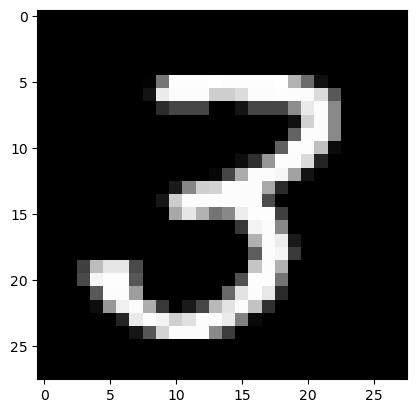

In [17]:
val_index =311


Z1val, A1val,Z2val,A2val = forward_propagation(W1,B1,W2,B2,X_val[:,val_index,None])
print("predicted_label",get_predictions(A2val))
print("actual_label",Y_val[val_index])


image_array = X_val[:,val_index].reshape(28,28)
pyplot.imshow(image_array,cmap='gray')
pyplot.show()
